In [1]:
import os
import pathlib

In [2]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image

import pandas as pd
from skimage.transform import resize
from skimage.io import imread
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
from platform import python_version
print(python_version())

3.7.4


In [4]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('landmarkDetector.dat')

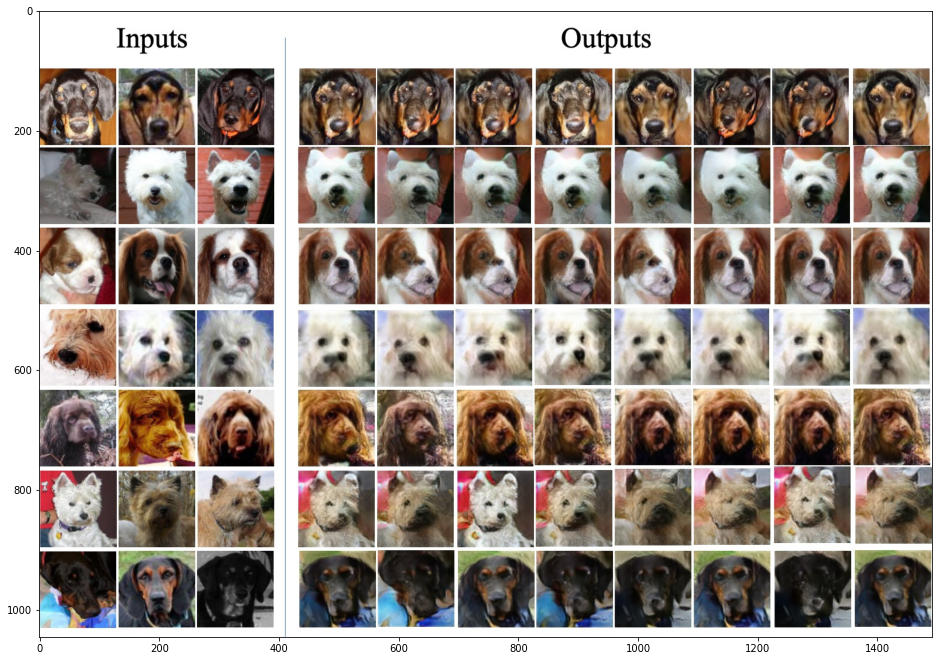

In [5]:
img_path = 'dog_3.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 16))
plt.imshow(img)

Detection 0: Left: 150 Top: 905 Right: 248 Bottom: 1004 Confidence: 1.059112310409546
Detection 1: Left: 1374 Top: 905 Right: 1472 Bottom: 1004 Confidence: 1.0518841743469238
Detection 2: Left: 30 Top: 653 Right: 98 Bottom: 721 Confidence: 1.051635503768921
Detection 3: Left: 825 Top: 93 Right: 943 Bottom: 211 Confidence: 1.0495686531066895
Detection 4: Left: 152 Top: 248 Right: 234 Bottom: 330 Confidence: 1.0482990741729736
Detection 5: Left: 431 Top: 93 Right: 549 Bottom: 211 Confidence: 1.04789137840271
Detection 6: Left: 578 Top: 99 Right: 676 Bottom: 198 Confidence: 1.0467925071716309
Detection 7: Left: 1374 Top: 637 Right: 1472 Bottom: 735 Confidence: 1.045067548751831
Detection 8: Left: 279 Top: 99 Right: 377 Bottom: 198 Confidence: 1.0418357849121094
Detection 9: Left: 694 Top: 93 Right: 812 Bottom: 211 Confidence: 1.0417985916137695
Detection 10: Left: 707 Top: 905 Right: 805 Bottom: 1004 Confidence: 1.0417382717132568
Detection 11: Left: 264 Top: 511 Right: 382 Bottom: 629 Co

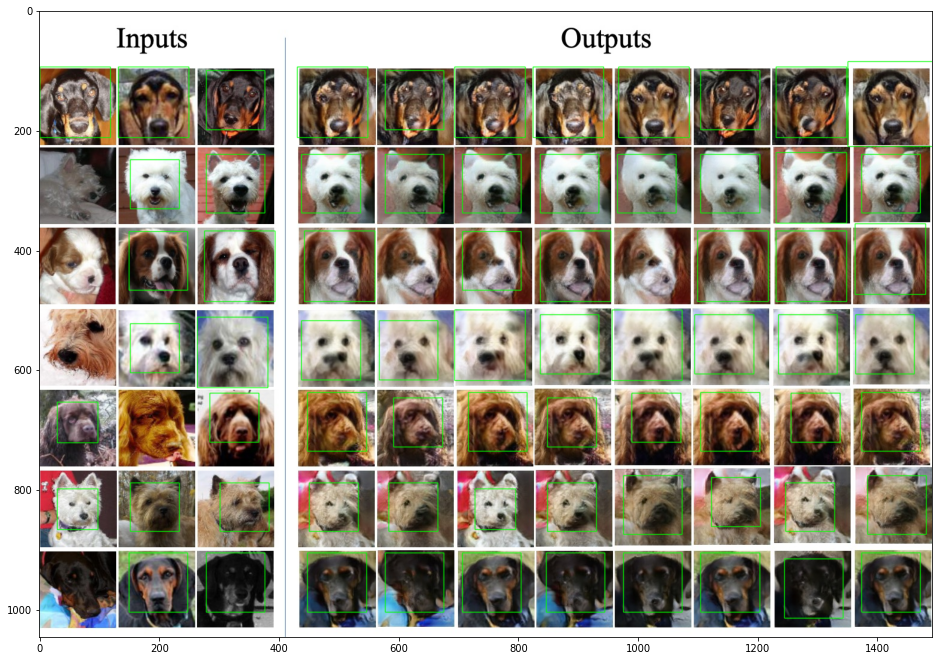

In [6]:
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()
crop_arr = []
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()
    crop_arr.append([x1, y1, x2, y2])
    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=1, color=(0,255,0), lineType=cv2.LINE_AA)
plt.figure(figsize=(16, 16))
plt.imshow(img_result)
#print(crop_arr[1])

In [187]:
#image.ImageDataGenerator()
#image.load_img('dog_1.jpg')

###Only for dog_1.jpg case, value and amount of arr has to be changed for other cases
dog0 = []
dog1 = []
dog2 = []
dog3 = []
dog4 = []
dog5 = []
dog6 = []
train = []
test = []
train_img = []
test_img = []
for i in range(len(crop_arr)):
    im = Image.open('dog_3.jpg')
    im = im.crop(crop_arr[i])
    im = im.resize((64, 64), Image.ANTIALIAS)
    if crop_arr[i][3] <= 250 :
        dog0.append(i)
        im.save("dog_type/dog0/" + str(i) + ".jpg")
    elif crop_arr[i][3] <= 400:
        dog1.append(i)
        im.save("dog_type/dog1/" + str(i) + ".jpg")
    elif crop_arr[i][3] <= 500:
        dog2.append(i)
        im.save("dog_type/dog2/" + str(i) + ".jpg")
    elif crop_arr[i][3] <= 650:
        dog3.append(i)
        im.save("dog_type/dog3/" + str(i) + ".jpg")
    elif crop_arr[i][3] <= 800:
        dog4.append(i)
        im.save("dog_type/dog4/" + str(i) + ".jpg")
    elif crop_arr[i][3] <= 900:
        dog5.append(i)
        im.save("dog_type/dog5/" + str(i) + ".jpg")
    else:
        dog6.append(i)
        im.save("dog_type/dog6/" + str(i) + ".jpg")
    if crop_arr[i][2] < 1000:
        im.save("train/" + str(i) + ".jpg")
        train.append(i)
    else:
        im.save("test/" + str(i) + ".jpg")
        test.append(i)

In [188]:
dog_type = ['dog0', 'dog1', 'dog2', 'dog3', 'dog4', 'dog5', 'dog6']
#for x in range(len(dog_type)):
#    os.mkdir('dog' + str(x))
input_arr = []
output_arr = []
dir_path = 'dog_type/'
for i in dog_type:
    path = os.path.join(dir_path, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(64,64,3))
        input_arr.append(img_resized.flatten())
        output_arr.append(dog_type.index(i))
input_value = np.array(input_arr)
output_value = np.array(output_arr)
df = pd.DataFrame(input_value) 
df['output'] = output_value
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x)

       0         1         2         3         4         5         6      \
0   1.000000  0.992157  0.968627  1.000000  0.996078  0.972549  1.000000   
1   0.407843  0.443137  0.368627  0.419608  0.454902  0.380392  0.458824   
2   0.945098  0.980392  0.976471  0.976471  1.000000  1.000000  0.960784   
3   0.921569  1.000000  1.000000  0.929412  1.000000  1.000000  0.964706   
4   0.992157  0.823529  0.698039  1.000000  0.870588  0.745098  1.000000   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.584314  0.564706  0.447059  0.560784  0.541176  0.423529  0.552941   
76  0.231373  0.223529  0.164706  0.211765  0.203922  0.145098  0.219608   
77  0.576471  0.576471  0.576471  0.564706  0.564706  0.564706  0.545098   
78  0.137255  0.137255  0.105882  0.098039  0.098039  0.066667  0.070588   
79  0.568627  0.568627  0.537255  0.462745  0.462745  0.431373  0.349020   

       7         8         9      ...     12278     12279     12280     12281  \
0   0.

In [189]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
#for i in range (len(dog_type)):
#    j = i + 1
#    if i == (len(dog_type) - 1):
#        break
#    for j in range (len(dog_type)):
train_1, test_1, train_2, test_2 = train_test_split(x, y, test_size = 0.4, random_state=95)
model.fit(train_1, train_2)
predictions = model.predict(test_1)
print("The predicted dog: ")

print(predictions)
print(np.array(test_2))
#print(train_1)
#print(train_2)

c:\users\alvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


The predicted dog: 
[5 0 4 1 0 1 0 2 2 3 4 0 5 4 1 2 5 1 6 4 4 3 6 5 3 0 3 6 3 1 0 1]
[5 0 4 1 0 1 0 2 2 3 4 1 5 4 1 4 5 1 6 4 4 3 6 5 3 0 3 6 3 1 1 1]


In [138]:
print(train)
print(test)

[0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 23, 24, 25, 27, 28, 29, 31, 33, 34, 36, 41, 42, 44, 45, 47, 49, 53, 55, 57, 59, 60, 62, 63, 66, 67, 69]
[1, 7, 18, 19, 21, 22, 26, 30, 32, 35, 37, 38, 39, 40, 43, 46, 48, 50, 51, 52, 54, 56, 58, 61, 64, 65, 68]


In [191]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
#from keras.utils import to_categorical

In [208]:
x_train = []
y_train = []
x_test = []
y_test = []
y_train_binary = []
y_test_binary = []
#zero_list = [0, 0, 0, 0, 0, 0, 0]
for i in train:
    filename = 'train/' + str(i) + '.jpg'
    im = Image.open(filename)
    temp = []
    for j in range(64):
        temp_64 = []
        for k in range(64):
            temp_tup = []
            colors = im.getpixel((j, k))
            temp_tup.append(int(colors[0]))
            temp_tup.append(int(colors[1]))
            temp_tup.append(int(colors[2]))
            temp_64.append(temp_tup)
        temp.append(temp_64)
    x_train.append(temp)
    
    if i in dog0:
        y_train.append([0])
        y_train_binary.append([1, 0, 0, 0, 0, 0, 0])
    elif i in dog1:
        y_train.append([1])
        y_train_binary.append([0, 1, 0, 0, 0, 0, 0])
    elif i in dog2:
        y_train.append([2])
        y_train_binary.append([0, 0, 1, 0, 0, 0, 0])
    elif i in dog3:
        y_train.append([3])
        y_train_binary.append([0, 0, 0, 1, 0, 0, 0])
    elif i in dog4:
        y_train.append([4])
        y_train_binary.append([0, 0, 0, 0, 1, 0, 0])
    elif i in dog5:
        y_train.append([5])
        y_train_binary.append([0, 0, 0, 0, 0, 1, 0])
    elif i in dog6:
        y_train.append([6])
        y_train_binary.append([0, 0, 0, 0, 0, 0, 1])
x_train_new = np.array(x_train)
y_train_new = np.array(y_train)
y_train_binary = np.array(y_train_binary)
for i in test:
    filename = 'test/' + str(i) + '.jpg'
    im = Image.open(filename)
    temp = []
    for j in range(64):
        temp_64 = []
        for k in range(64):
            temp_tup = []
            colors = im.getpixel((j, k))
            temp_tup.append(int(colors[0]))
            temp_tup.append(int(colors[1]))
            temp_tup.append(int(colors[2]))
            temp_64.append(temp_tup)
        temp.append(temp_64)
    x_test.append(temp)
    
    if i in dog0:
        y_test.append([0])
        y_test_binary.append([1, 0, 0, 0, 0, 0, 0])
    elif i in dog1:
        y_test.append([1])
        y_test_binary.append([0, 1, 0, 0, 0, 0, 0])
    elif i in dog2:
        y_test.append([2])
        y_test_binary.append([0, 0, 1, 0, 0, 0, 0])
    elif i in dog3:
        y_test.append([3])
        y_test_binary.append([0, 0, 0, 1, 0, 0, 0])
    elif i in dog4:
        y_test.append([4])
        y_test_binary.append([0, 0, 0, 0, 1, 0, 0])
    elif i in dog5:
        y_test.append([5])
        y_test_binary.append([0, 0, 0, 0, 0, 1, 0])
    elif i in dog6:
        y_test.append([6])
        y_test_binary.append([0, 0, 0, 0, 0, 0, 1])
x_test_new = np.array(x_test)
y_test_new = np.array(y_test)
print(x_test_new)
print(x_test_new.shape)
y_test_binary = np.array(y_test_binary)
#Normalize the value of pixels
x_train_new = x_train_new / 255
x_test_new = x_test_new / 255

[[[[145 160  93]
   [140 155  88]
   [136 148  82]
   ...
   [ 52  61  70]
   [ 50  59  68]
   [ 49  58  67]]

  [[150 165  98]
   [145 160  93]
   [141 153  87]
   ...
   [ 53  62  71]
   [ 59  68  77]
   [ 63  72  81]]

  [[151 166 101]
   [147 162  97]
   [144 156  90]
   ...
   [ 57  66  75]
   [ 65  74  83]
   [ 71  80  89]]

  ...

  [[175 172 129]
   [163 160 117]
   [156 151 109]
   ...
   [ 91 110 142]
   [100 122 159]
   [108 132 170]]

  [[184 181 140]
   [179 176 135]
   [175 170 128]
   ...
   [ 91 111 146]
   [101 124 165]
   [109 132 176]]

  [[188 185 144]
   [196 193 152]
   [201 196 154]
   ...
   [ 89 109 146]
   [ 98 121 163]
   [103 127 173]]]


 [[[138  97  41]
   [126  85  29]
   [119  78  24]
   ...
   [132 105  76]
   [143 116  87]
   [151 124  95]]

  [[135  94  38]
   [122  81  25]
   [118  77  23]
   ...
   [116  89  62]
   [132 105  78]
   [144 117  90]]

  [[137  96  42]
   [123  82  28]
   [119  78  24]
   ...
   [ 72  46  21]
   [ 81  55  30]
   [ 88  62

In [198]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [199]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [205]:
hist = model.fit(x_train_new, y_train_binary, batch_size=256, epochs=30, validation_split=0.3)

Epoch 1/30
1/1 [==============================] - 0s 387ms/step - loss: 4.0211e-05 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9231
Epoch 2/30
1/1 [==============================] - 0s 379ms/step - loss: 9.3003e-04 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9231
Epoch 3/30
1/1 [==============================] - 0s 364ms/step - loss: 5.0562e-05 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9231
Epoch 4/30
1/1 [==============================] - 0s 359ms/step - loss: 4.3800e-05 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9231
Epoch 5/30
1/1 [==============================] - 0s 363ms/step - loss: 2.3377e-05 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9231
Epoch 6/30
1/1 [==============================] - 0s 327ms/step - loss: 5.6549e-05 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 360ms/step - loss: 1.2161e-04 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy:

In [180]:
print(tf.__version__)

2.8.0
